In [83]:
import pandas as pd
from plotnine import *
import numpy as np

In [84]:
df = pd.read_csv('outFLcvar_221014.txt', sep=' ', names=['file','it','LB','UB','Gap','FeasCut','OptCut','PartSize','time'])
df['seed'] = df['file'].str.extract(r'_(\d*).out').astype('int')
df['nScen'] = df['file'].str.extract(r'txt_(\d*)_').astype('int')
df['method'] = df['file'].str.extract(r'_([ampsf])_\d*.out')
df['instance'] = df['file'].str.extract(r'FLCVAR_(.*).txt')
det = df['file'].str.split('_', expand=True)
df['family']=det[1]
df['pNumber']=det[2]
df['config']=det[3].str.extract(r'(\d)')

In [85]:
df['instanceFamily'] = df['instance'].str.slice(start=0, stop=4) + 'x'
df['method'] = pd.Categorical(df['method'], categories=['f','a','m','s'], ordered=True)

In [86]:
#df['time'].isna()
#df['instance'] = pd.Categorical(df['instance'], categories=['cap61','cap62','cap63','cap64','cap101','cap102','cap103','cap104','cap131','cap132','cap133','cap134'])
df['instance'] = pd.Categorical(df['instance'], categories=['cap41','cap42','cap43','cap44','cap61','cap62','cap63','cap64','cap71','cap72','cap73','cap74'])
#df['nScen']  = pd.Categorical(df['nScen'], categories=['100','500','1000','2500','5000'])



In [87]:
df.loc[df['time'] > 86400,'time']=np.nan

In [91]:
df[(df['nScen']==100) & (df['method']=='a') & (df['seed']==1) & (df['instance']=='cap41')]

,file,it,LB,UB,Gap,FeasCut,OptCut,PartSize,time,seed,nScen,method,instance,family,pNumber,config,instanceFamily
41,outFLCVAR221014/FLCVAR_cap41.txt_100_a_1.out:F...,7,643401.317969,643401.317969,0.0,0,6296,27,33.589583,1,100,a,cap41,cap41.txt,100,NaN,cap4x


In [92]:
df.groupby(['nScen','method'], dropna=True)['LB'].count()

nScen  method
100    f         120
       a         120
       m         120
       s         120
500    f         120
       a         120
       m         120
       s         120
1000   f         120
       a         120
       m         120
       s         120
2500   f         120
       a         120
       m         120
       s         120
Name: LB, dtype: int64

In [93]:
df.groupby(['instance','nScen'])['LB'].var().sort_values(ascending=False)

instance  nScen
cap71     100      3.902102e+08
cap61     100      3.902102e+08
cap41     100      3.863222e+08
cap72     100      3.729228e+08
cap62     100      3.729228e+08
cap42     100      3.703945e+08
cap43     100      3.650789e+08
cap44     100      3.650789e+08
cap63     100      3.524109e+08
cap64     100      3.507739e+08
cap74     100      3.389383e+08
cap73     100      3.326525e+08
cap63     2500     1.976795e+08
cap73     2500     2.927969e+07
cap64     2500     2.834146e+07
cap74     500      1.482549e+07
cap64     500      1.433924e+07
cap63     500      1.428830e+07
cap73     500      1.359665e+07
cap71     500      1.352632e+07
cap61     500      1.352632e+07
cap41     500      1.333775e+07
cap72     500      1.253424e+07
cap62     500      1.253424e+07
cap42     500      1.214077e+07
cap43     500      1.202281e+07
cap44     500      1.202281e+07
cap74     1000     8.449923e+06
cap41     1000     7.962232e+06
cap63     1000     7.798693e+06
cap64     1000     7.782

In [94]:
df.groupby(['nScen','method'])['time'].count() 

nScen  method
100    f         120
       a         120
       m         120
       s         120
500    f         120
       a         120
       m         120
       s         120
1000   f         120
       a         120
       m         120
       s         120
2500   f         120
       a         120
       m         120
       s         120
Name: time, dtype: int64

In [95]:
df.columns

Index(['file', 'it', 'LB', 'UB', 'Gap', 'FeasCut', 'OptCut', 'PartSize',
       'time', 'seed', 'nScen', 'method', 'instance', 'family', 'pNumber',
       'config', 'instanceFamily'],
      dtype='object')

In [96]:
df.groupby(['nScen','method'])['time'].count()

nScen  method
100    f         120
       a         120
       m         120
       s         120
500    f         120
       a         120
       m         120
       s         120
1000   f         120
       a         120
       m         120
       s         120
2500   f         120
       a         120
       m         120
       s         120
Name: time, dtype: int64

In [97]:
nSeeds = 10
nRuns = nSeeds * df['instance'].nunique()
df['rank']=df.groupby(['nScen','method'])['time'].rank('min')/nRuns


In [98]:
maxRank = df.groupby(['nScen','method'])['rank'].max().reset_index()
df2 = df.copy()
#for row in maxRank.iterrows():
#    df2.loc[len(df2)] = [None,None,None,None,None,None,None,None,0,row[1]['nScen'],row[1]['method'],None,None,None,None,None,0]
#     if (row[1]['rank']<1):
#         df2.loc[len(df2)] = [None,None,None,None,None,None,None,None,7200,row[1]['nScen'],row[1]['method'],None,None,None,None,None,row[1]['rank']]

In [99]:
df2['Algorithm'] = df2['method'].replace({'a': 'Adaptive', 'm':'Multi', 's':'Single', 'f':'Det. Equiv.'})

In [108]:
df2['Algorithm'] = pd.Categorical(df2['Algorithm'], categories=['Adaptive','Multi','Single','Det. Equiv.'])

['Adaptive', 'Adaptive', 'Adaptive', 'Adaptive', 'Adaptive', ..., 'Single', 'Single', 'Single', 'Single', 'Single']
Length: 1920
Categories (4, object): ['Adaptive' < 'Multi' < 'Single' < 'Det. Equiv.']

/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 2 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: FLcvar_profile.pdf
/opt/homebrew/lib/python3.11/site-packages/plotnine/scales/scale_linetype.py:46: PlotnineWarning: Using linetype for an ordinal variable is not advised.
/opt/homebrew/lib/python3.11/site-packages/plotnine/scales/scale_linetype.py:46: PlotnineWarning: Using linetype for an ordinal variable is not advised.


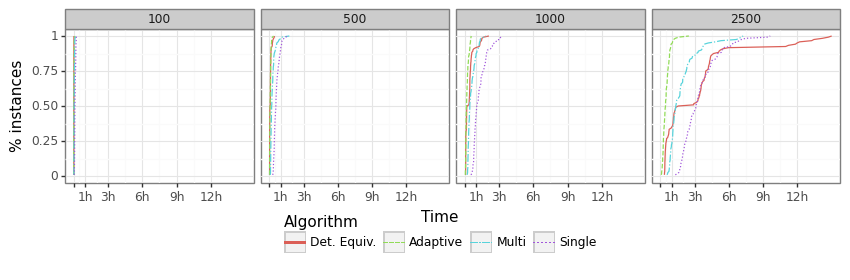

<ggplot: (680339061)>

In [104]:
gg = ggplot(df2[df2['nScen']!=5000],
            aes(x='time', y='rank', color='Algorithm', linetype='Algorithm', group='Algorithm'))\
+ geom_line() + facet_wrap('nScen', scales='fixed', nrow=1)\
+ scale_color_hue()\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)\
+ scale_x_continuous(breaks=[0,3600,10800, 21600, 32400, 43200], \
                     labels=['', '1h', '3h', '6h', '9h', '12h'])\
+ theme(figure_size=(10,2), legend_position='bottom', legend_title=None)
#+ scale_x_log10(breaks=[10,60,300, 900, 3600]) 
gg.save('FLcvar_profile.pdf')
gg

/opt/homebrew/lib/python3.11/site-packages/plotnine/geoms/geom_path.py:75: PlotnineWarning: geom_path: Removed 120 rows containing missing values.


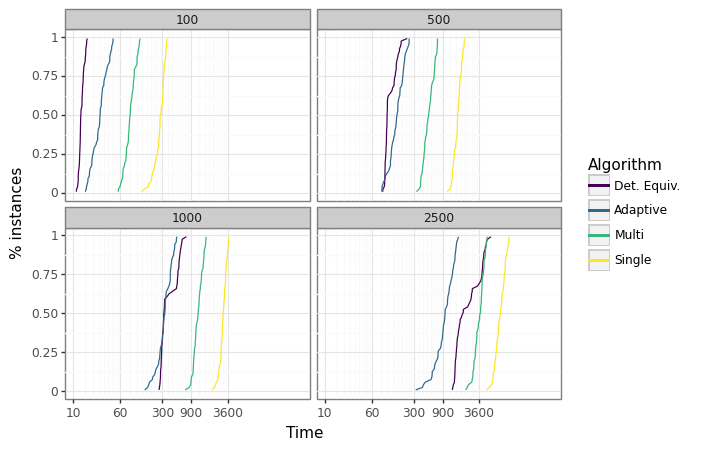

<ggplot: (672145313)>

In [19]:
ggplot(df2[df2['nScen']!=5000], aes(x='time', y='rank', color='Algorithm', group='Algorithm')) + geom_line() + facet_wrap('nScen')\
+ xlab('Time') + ylab('% instances') + theme_bw() + ylim(0,1)\
+ scale_x_log10(breaks=[10,60,300, 900, 3600]) 

In [20]:
timeA = df[df['method']=='a'].groupby(['instance','nScen','seed'])['time'].mean()

In [21]:
df['timeRel'] = df.apply(lambda x : x['time']/timeA.loc[x['instance'],x['nScen'],x['seed']], axis=1)
df['logtimeRel'] = np.log(df['timeRel'])

In [22]:
PTrelTimes = np.exp(df.pivot_table(index=['instanceFamily','nScen'], columns='method', values='logtimeRel', aggfunc='mean')).round(2)
PTrelTimes

method                    f    a     m      s
instanceFamily nScen                         
cap4x          100     0.20  1.0  2.73   5.57
               500     0.33  1.0  3.30   6.68
               1000    0.46  1.0  3.04   6.82
               2500    0.94  1.0  3.47   6.50
cap6x          100     0.38  1.0  2.77   8.10
               500     0.88  1.0  2.87   7.09
               1000    1.54  1.0  2.79   6.13
               2500    4.92  1.0  3.42   5.87
cap7x          100     0.95  1.0  3.25  12.19
               500     2.74  1.0  3.57  11.45
               1000    5.56  1.0  3.88  10.13
               2500   14.42  1.0  4.04   9.95

In [23]:
df.columns

Index(['file', 'it', 'LB', 'UB', 'Gap', 'FeasCut', 'OptCut', 'PartSize',
       'time', 'seed', 'nScen', 'method', 'instance', 'family', 'pNumber',
       'config', 'instanceFamily', 'rank', 'timeRel', 'logtimeRel'],
      dtype='object')

In [24]:
PTresults = df.pivot_table(index=['instanceFamily','nScen'], columns='method', values=['time','it','OptCut'])
PTresults

OptCut                                     it          \
method                    f           a           m         s    f       a   
instanceFamily nScen                                                         
cap4x          100      0.0   14725.725   24056.050  2856.450  0.0   8.625   
               500      0.0   53182.575  129223.050  3370.700  0.0  15.075   
               1000     0.0  106139.925  229659.750  3643.400  0.0  18.200   
               2500     0.0  208466.275  587637.275  3818.125  0.0  23.725   
cap6x          100      0.0   10601.625   23881.175  3223.025  0.0   8.950   
               500      0.0   49267.575  125685.050  3745.475  0.0  15.975   
               1000     0.0   94975.375  235090.200  3784.975  0.0  19.125   
               2500     0.0  190432.975  587653.125  3612.000  0.0  24.350   
cap7x          100      0.0    5344.800   13696.150  2417.400  0.0   9.225   
               500      0.0   22435.050   69123.875  2635.275  0.0  16.050   
               1000     0.0   42239.725  138971.525  2626.550  0.0  20.000   
               2500     0.0   95468.025  324070.975  2955.875  0.0  24.575   

                                        time                            \
method                  m    s             f            a            m   
instanceFamily nScen                                                     
cap4x          100    1.0  1.0     13.239091    81.049182   201.789682   
               500    1.0  1.0    105.315264   361.527724  1223.907948   
               1000   1.0  1.0    310.997257   823.066519  2363.863420   
               2500   1.0  1.0   1776.817783  2020.414497  7203.296494   
cap6x          100    1.0  1.0     22.555051    63.940738   181.541732   
               500    1.0  1.0    338.196329   412.474833  1292.430123   
               1000   1.0  1.0   1404.328248   937.413778  2641.139915   
               2500   1.0  1.0  11667.889465  2449.700847  9020.406364   
cap7x          100    1.0  1.0     27.226104    28.835798    90.630346   
               500    1.0  1.0    550.241762   168.133331   580.591356   
               1000   1.0  1.0   2452.983525   354.183544  1319.335987   
               2500   1.0  1.0  19975.840455  1098.068688  4074.413803   

                                    
method                           s  
instanceFamily nScen                
cap4x          100      421.454805  
               500     2285.740220  
               1000    5037.669020  
               2500   13013.624034  
cap6x          100      495.550275  
               500     2667.953488  
               1000    5508.688965  
               2500   13861.256674  
cap7x          100      337.882893  
               500     1875.762334  
               1000    3452.165439  
               2500   10227.232951

In [25]:
tableToPaper = pd.concat([
    PTresults.loc[:,('time','a')].round(1),
    PTresults.loc[:,('it','a')].round(1),
    PTresults.loc[:,('OptCut','a')].round(0),
    PTresults.loc[:,('time','m')].round(1),
    ('('+PTrelTimes.loc[:,'m'].astype('string')+')'),
    PTresults.loc[:,('OptCut','m')].round(0),
    PTresults.loc[:,('time','s')].round(1),
    ('('+PTrelTimes.loc[:,'s'].astype('string')+')'),
    PTresults.loc[:,('OptCut','s')].round(0),
    PTresults.loc[:,('time','f')].round(1),
    ('('+PTrelTimes.loc[:,'f'].astype('string')+')'),
], axis=1)
tableToPaper

(time, a)  (it, a)  (OptCut, a)  (time, m)       m  \
instanceFamily nScen                                                       
cap4x          100         81.0      8.6      14726.0      201.8  (2.73)   
               500        361.5     15.1      53183.0     1223.9   (3.3)   
               1000       823.1     18.2     106140.0     2363.9  (3.04)   
               2500      2020.4     23.7     208466.0     7203.3  (3.47)   
cap6x          100         63.9      9.0      10602.0      181.5  (2.77)   
               500        412.5     16.0      49268.0     1292.4  (2.87)   
               1000       937.4     19.1      94975.0     2641.1  (2.79)   
               2500      2449.7     24.4     190433.0     9020.4  (3.42)   
cap7x          100         28.8      9.2       5345.0       90.6  (3.25)   
               500        168.1     16.0      22435.0      580.6  (3.57)   
               1000       354.2     20.0      42240.0     1319.3  (3.88)   
               2500      1098.1     24.6      95468.0     4074.4  (4.04)   

                      (OptCut, m)  (time, s)        s  (OptCut, s)  (time, f)  \
instanceFamily nScen                                                            
cap4x          100        24056.0      421.5   (5.57)       2856.0       13.2   
               500       129223.0     2285.7   (6.68)       3371.0      105.3   
               1000      229660.0     5037.7   (6.82)       3643.0      311.0   
               2500      587637.0    13013.6    (6.5)       3818.0     1776.8   
cap6x          100        23881.0      495.6    (8.1)       3223.0       22.6   
               500       125685.0     2668.0   (7.09)       3745.0      338.2   
               1000      235090.0     5508.7   (6.13)       3785.0     1404.3   
               2500      587653.0    13861.3   (5.87)       3612.0    11667.9   
cap7x          100        13696.0      337.9  (12.19)       2417.0       27.2   
               500        69124.0     1875.8  (11.45)       2635.0      550.2   
               1000      138972.0     3452.2  (10.13)       2627.0     2453.0   
               2500      324071.0    10227.2   (9.95)       2956.0    19975.8   

                            f  
instanceFamily nScen           
cap4x          100      (0.2)  
               500     (0.33)  
               1000    (0.46)  
               2500    (0.94)  
cap6x          100     (0.38)  
               500     (0.88)  
               1000    (1.54)  
               2500    (4.92)  
cap7x          100     (0.95)  
               500     (2.74)  
               1000    (5.56)  
               2500   (14.42)

In [26]:
print(tableToPaper.to_latex())

\begin{tabular}{llrrrrlrrlrrl}
\toprule
      &      &  (time, a) &  (it, a) &  (OptCut, a) &  (time, m) &       m &  (OptCut, m) &  (time, s) &        s &  (OptCut, s) &  (time, f) &        f \\
instanceFamily & nScen &            &          &              &            &         &              &            &          &              &            &          \\
\midrule
cap4x & 100  &       81.0 &      8.6 &      14726.0 &      201.8 &  (2.73) &      24056.0 &      421.5 &   (5.57) &       2856.0 &       13.2 &    (0.2) \\
      & 500  &      361.5 &     15.1 &      53183.0 &     1223.9 &   (3.3) &     129223.0 &     2285.7 &   (6.68) &       3371.0 &      105.3 &   (0.33) \\
      & 1000 &      823.1 &     18.2 &     106140.0 &     2363.9 &  (3.04) &     229660.0 &     5037.7 &   (6.82) &       3643.0 &      311.0 &   (0.46) \\
      & 2500 &     2020.4 &     23.7 &     208466.0 &     7203.3 &  (3.47) &     587637.0 &    13013.6 &    (6.5) &       3818.0 &     1776.8 &   (0.94) \\
cap6x

/var/folders/l3/bdd4cn2n54n618r3kn2qtq6w0000gn/T/ipykernel_21636/1502265818.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


/opt/homebrew/lib/python3.11/site-packages/plotnine/facets/facet.py:440: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


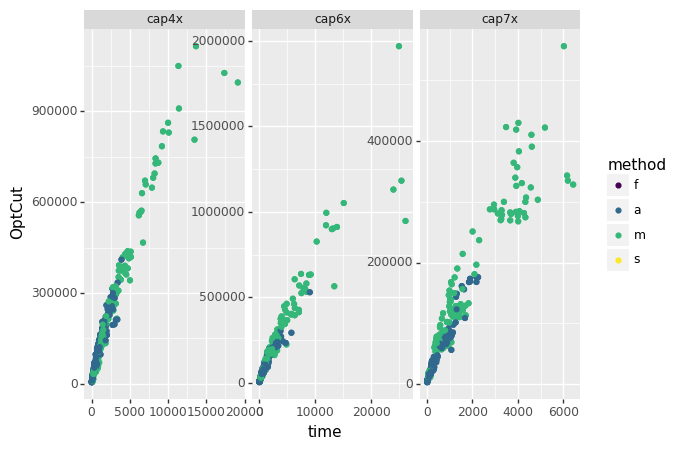

<ggplot: (672416685)>

In [27]:
ggplot(df[df['method'].isin(['a','m'])], aes(x='time', y='OptCut', color='method'))\
+ geom_point() + facet_wrap('instanceFamily', scales='free')

In [28]:

ptTime = df.pivot_table(index=['nScen','instanceFamily'],\
            columns='method',values='time', aggfunc='mean').round(1)
ptTime

method                      f       a       m        s
nScen instanceFamily                                  
100   cap4x              13.2    81.0   201.8    421.5
      cap6x              22.6    63.9   181.5    495.6
      cap7x              27.2    28.8    90.6    337.9
500   cap4x             105.3   361.5  1223.9   2285.7
      cap6x             338.2   412.5  1292.4   2668.0
      cap7x             550.2   168.1   580.6   1875.8
1000  cap4x             311.0   823.1  2363.9   5037.7
      cap6x            1404.3   937.4  2641.1   5508.7
      cap7x            2453.0   354.2  1319.3   3452.2
2500  cap4x            1776.8  2020.4  7203.3  13013.6
      cap6x           11667.9  2449.7  9020.4  13861.3
      cap7x           19975.8  1098.1  4074.4  10227.2

In [29]:
ptCuts = df[df['method']!='f'].pivot_table(index=['nScen','instanceFamily'],\
            columns='method',values='OptCut', aggfunc='mean').round(1)
ptCuts

method                       a         m       s
nScen instanceFamily                            
100   cap4x            14725.7   24056.0  2856.4
      cap6x            10601.6   23881.2  3223.0
      cap7x             5344.8   13696.2  2417.4
500   cap4x            53182.6  129223.0  3370.7
      cap6x            49267.6  125685.0  3745.5
      cap7x            22435.0   69123.9  2635.3
1000  cap4x           106139.9  229659.8  3643.4
      cap6x            94975.4  235090.2  3785.0
      cap7x            42239.7  138971.5  2626.6
2500  cap4x           208466.3  587637.3  3818.1
      cap6x           190433.0  587653.1  3612.0
      cap7x            95468.0  324071.0  2955.9

In [30]:
df['PartSizeRel'] = df['PartSize']/df['nScen'].astype('int')
#df[df['method']=='a'].pivot(index='instance',columns='nScen', values=['it','PartSizeRel'])
ptAdap = df[df['method']=='a'].pivot_table(index=['nScen','instanceFamily'],\
                columns='method', values=['it','PartSizeRel']).round(2)
ptAdap

PartSizeRel     it
method                         a      a
nScen instanceFamily                   
100   cap4x                 0.22   8.62
      cap6x                 0.22   8.95
      cap7x                 0.22   9.22
500   cap4x                 0.15  15.08
      cap6x                 0.16  15.98
      cap7x                 0.16  16.05
1000  cap4x                 0.14  18.20
      cap6x                 0.14  19.12
      cap7x                 0.15  20.00
2500  cap4x                 0.12  23.72
      cap6x                 0.12  24.35
      cap7x                 0.14  24.58

In [31]:
pd.concat([ptTime,ptCuts,ptAdap], axis=1)

f       a       m        s         a         m  \
nScen instanceFamily                                                         
100   cap4x              13.2    81.0   201.8    421.5   14725.7   24056.0   
      cap6x              22.6    63.9   181.5    495.6   10601.6   23881.2   
      cap7x              27.2    28.8    90.6    337.9    5344.8   13696.2   
500   cap4x             105.3   361.5  1223.9   2285.7   53182.6  129223.0   
      cap6x             338.2   412.5  1292.4   2668.0   49267.6  125685.0   
      cap7x             550.2   168.1   580.6   1875.8   22435.0   69123.9   
1000  cap4x             311.0   823.1  2363.9   5037.7  106139.9  229659.8   
      cap6x            1404.3   937.4  2641.1   5508.7   94975.4  235090.2   
      cap7x            2453.0   354.2  1319.3   3452.2   42239.7  138971.5   
2500  cap4x            1776.8  2020.4  7203.3  13013.6  208466.3  587637.3   
      cap6x           11667.9  2449.7  9020.4  13861.3  190433.0  587653.1   
      cap7x           19975.8  1098.1  4074.4  10227.2   95468.0  324071.0   

                           s  (PartSizeRel, a)  (it, a)  
nScen instanceFamily                                     
100   cap4x           2856.4              0.22     8.62  
      cap6x           3223.0              0.22     8.95  
      cap7x           2417.4              0.22     9.22  
500   cap4x           3370.7              0.15    15.08  
      cap6x           3745.5              0.16    15.98  
      cap7x           2635.3              0.16    16.05  
1000  cap4x           3643.4              0.14    18.20  
      cap6x           3785.0              0.14    19.12  
      cap7x           2626.6              0.15    20.00  
2500  cap4x           3818.1              0.12    23.72  
      cap6x           3612.0              0.12    24.35  
      cap7x           2955.9              0.14    24.58

In [32]:
print(pd.concat([ptTime,ptCuts,ptAdap], axis=1).to_latex()) #float_format="%.2f"))

\begin{tabular}{llrrrrrrrrr}
\toprule
     &       &        f &       a &       m &        s &         a &         m &       s &  (PartSizeRel, a) &  (it, a) \\
nScen & instanceFamily &          &         &         &          &           &           &         &                   &          \\
\midrule
100  & cap4x &     13.2 &    81.0 &   201.8 &    421.5 &   14725.7 &   24056.0 &  2856.4 &              0.22 &     8.62 \\
     & cap6x &     22.6 &    63.9 &   181.5 &    495.6 &   10601.6 &   23881.2 &  3223.0 &              0.22 &     8.95 \\
     & cap7x &     27.2 &    28.8 &    90.6 &    337.9 &    5344.8 &   13696.2 &  2417.4 &              0.22 &     9.22 \\
500  & cap4x &    105.3 &   361.5 &  1223.9 &   2285.7 &   53182.6 &  129223.0 &  3370.7 &              0.15 &    15.08 \\
     & cap6x &    338.2 &   412.5 &  1292.4 &   2668.0 &   49267.6 &  125685.0 &  3745.5 &              0.16 &    15.98 \\
     & cap7x &    550.2 &   168.1 &   580.6 &   1875.8 &   22435.0 &   69123.9 &  

/var/folders/l3/bdd4cn2n54n618r3kn2qtq6w0000gn/T/ipykernel_21636/3836756010.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [33]:
res = df[df['method']!='f'].pivot_table(index='nScen', columns='method', values=['time','OptCut'])
res.columns

MultiIndex([('OptCut', 'a'),
            ('OptCut', 'm'),
            ('OptCut', 's'),
            (  'time', 'a'),
            (  'time', 'm'),
            (  'time', 's')],
           names=[None, 'method'])

In [34]:
print(res.swaplevel(axis=1).sort_index(axis=1).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
method & \multicolumn{2}{l}{a} & \multicolumn{2}{l}{m} & \multicolumn{2}{l}{s} \\
{} &    OptCut &    time &    OptCut &    time &  OptCut &     time \\
nScen &           &         &           &         &         &          \\
\midrule
100   &  10224.05 &   57.94 &  20544.46 &  157.99 & 2832.29 &   418.30 \\
500   &  41628.40 &  314.05 & 108010.66 & 1032.31 & 3250.48 &  2276.49 \\
1000  &  81118.34 &  704.89 & 201240.49 & 2108.11 & 3351.64 &  4666.17 \\
2500  & 164789.09 & 1856.06 & 499787.12 & 6766.04 & 3462.00 & 12367.37 \\
\bottomrule
\end{tabular}



/var/folders/l3/bdd4cn2n54n618r3kn2qtq6w0000gn/T/ipykernel_21636/2149590436.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.


In [35]:
df['nScenText'] = df['nScen'].replace({100:'0.1', 500: '0.5', 1000: '1.0', 2500:'2.5'})

/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:718: PlotnineWarning: Saving 10 x 5 in image.
/opt/homebrew/lib/python3.11/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Filename: FLcvar_objective1.pdf


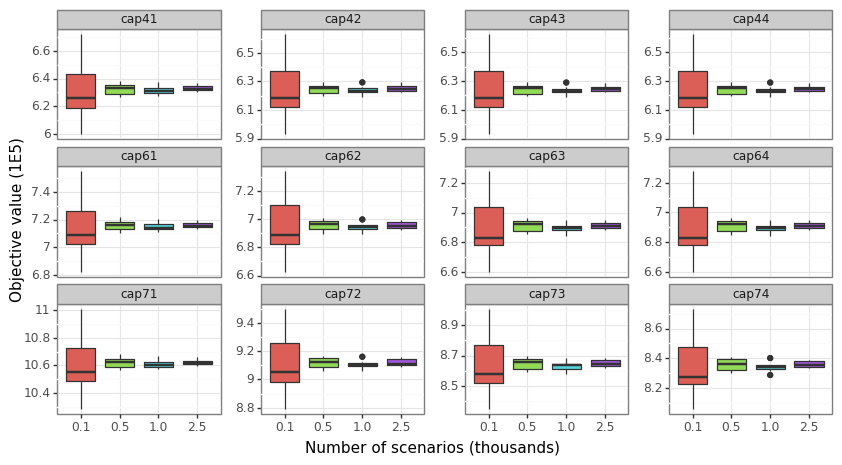

<ggplot: (674606185)>

In [50]:
gg = ggplot(df[df['method']=='a'], aes(x='nScenText', y='LB/10**5', fill='nScenText'))\
+ geom_boxplot() + facet_wrap('instance', scales='free_y', nrow=3)\
+ scale_y_continuous() + scale_fill_hue(name='# Scenarios', guide=False)\
+ xlab('Number of scenarios (thousands)') + ylab('Objective value (1E5)')\
+ theme_bw() + theme(figure_size=(10,5),subplots_adjust={'wspace': 0.25}) 
gg.save('FLcvar_objective1.pdf')
gg

/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


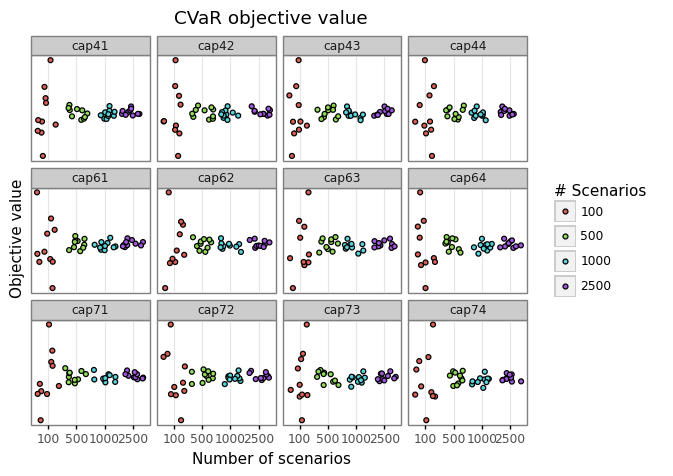

<ggplot: (328503802)>

In [134]:
gg = ggplot(df[df['method']=='a'], aes(x='factor(nScen)', y='LB', fill='factor(nScen)'))\
+ geom_jitter() + facet_wrap('instance', scales='free_y')\
+ scale_y_continuous(breaks=None) + scale_fill_hue(name='# Scenarios')\
+ ggtitle('CVaR objective value') + xlab('Number of scenarios') + ylab('Objective value')\
+ theme(figure_size=(9,4)) + theme_bw()
gg

/usr/local/lib/python3.9/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/usr/local/lib/python3.9/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: FLcvar_objective2.pdf
/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.
/usr/local/lib/python3.9/site-packages/plotnine/facets/facet.py:390: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


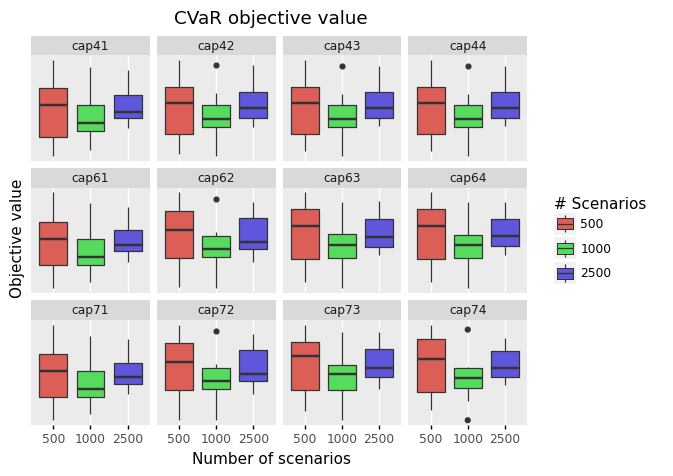

<ggplot: (319523021)>

In [83]:
gg= ggplot(df[(df['method']=='a') & (df['nScen']!=100)], aes(x='factor(nScen)', y='LB', fill='factor(nScen)'))\
+ geom_boxplot() + facet_wrap('instance', scales='free_y')\
+ scale_y_continuous(breaks=None) + scale_fill_hue(name='# Scenarios')\
+ ggtitle('CVaR objective value') + xlab('Number of scenarios') + ylab('Objective value')
gg.save('FLcvar_objective2.pdf')
gg

In [117]:
dfSol = pd.read_csv('outsolutions.txt', sep=':', names=['file','xx1','tau','sol'])
dfSol['seed'] = dfSol['file'].str.extract(r'_(\d*).out').astype('int')
dfSol['nScen'] = dfSol['file'].str.extract(r'txt_(\d*)_').astype('int')
dfSol['method'] = dfSol['file'].str.extract(r'_([ampsf])_\d*.out')
dfSol['instance'] = dfSol['file'].str.extract(r'FLCVAR_(.*).txt')
det = dfSol['file'].str.split('_', expand=True)
dfSol['family']=det[1]
dfSol['pNumber']=det[2]
dfSol['config']=det[3].str.extract(r'(\d*).out')

In [124]:
dfSol[dfSol['method']=='a'].groupby(['nScen','instance'])['sol'].nunique()

nScen  instance
100    cap41       4
       cap42       4
       cap43       4
       cap44       4
       cap61       1
       cap62       2
       cap63       3
       cap64       3
       cap71       1
       cap72       2
       cap73       1
       cap74       1
500    cap41       2
       cap42       2
       cap43       2
       cap44       2
       cap61       1
       cap62       1
       cap63       3
       cap64       3
       cap71       1
       cap72       1
       cap73       1
       cap74       2
1000   cap41       2
       cap42       2
       cap43       2
       cap44       2
       cap61       1
       cap62       1
       cap63       2
       cap64       2
       cap71       1
       cap72       1
       cap73       1
       cap74       1
2500   cap41       1
       cap42       1
       cap43       1
       cap44       1
       cap61       1
       cap62       1
       cap63       2
       cap64       2
       cap71       1
       cap72       1
       cap73      